# 🧪 Practical Exam: Data Mining with Python — GlobalTrade Ltd.

**Course:** Data Mining  
**Format:** Hands-on (Jupyter Notebook)  
**Dataset:** `global_sales.csv`  
**Context:** บริษัท “**GlobalTrade Ltd.**” เป็นบริษัทค้าปลีกข้ามชาติที่จำหน่ายสินค้าหลากหลายประเภททั่วโลก ต้องการใช้ Data Mining เพื่อวิเคราะห์ยอดขายและผลกำไร เพื่อปรับกลยุทธ์การขายให้เหมาะสมกับแต่ละภูมิภาคและช่องทางการขาย

**Schema (columns):**  
`Region, Country, Item Type, Sales Channel, Order Priority, Order Date, Order ID, Ship Date, Units Sold, Unit Price, Unit Cost, Total Revenue, Total Cost, Total Profit`

> 🔒 **ข้อกำหนดการทำข้อสอบ**: ห้ามลบเซลล์ข้อสอบ แต่สามารถเพิ่มเซลล์ใหม่ใต้แต่ละข้อเพื่อแสดงการทำงานเพิ่มเติม  
> 📝 **รูปแบบคำตอบ**: แบบเติมคำ (fill-in) ในส่วน `____` และ/หรือเพิ่มโค้ดของคุณเอง


## คำแนะนำโดยรวม
- รันเซลล์ตามลำดับจากบนลงล่าง
- ถ้าเห็น `____` ให้เติมคำสั่ง/พารามิเตอร์ให้ถูกต้อง
- เมื่อเสร็จสิ้นในแต่ละตอน ให้รันเพื่อตรวจว่าไม่มี error
- เซฟไฟล์เป็น: `dm_exam_รหัสนักศึกษา.ipynb` ก่อนส่ง  `sitthikorn.m@rmutsb.ac.th`

---


---
## ตอนที่ 1: การนำเข้าไลบรารี (5 คะแนน)

**โจทย์:** นำเข้าไลบรารีสำหรับงาน Data Mining ได้แก่ `pandas`, `numpy`, `matplotlib`, `seaborn`, และโมดูลจาก `sklearn`

> เติมคำสั่งในช่องว่างให้ถูกต้อง


In [1]:
# เติมคำสั่งให้ครบ/ถูกต้อง
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
# แสดงกราฟในโน้ตบุ๊ก
%matplotlib inline


---
## ตอนที่ 2: การนำเข้าข้อมูล (5 คะแนน)

**โจทย์:** อ่านไฟล์ `global_sales.csv` เป็นตัวแปร `df` และแสดงข้อมูล 5 แถวแรก

> เติมคำสั่งให้ถูกต้อง


In [3]:
# เติมคำสั่งให้ถูกต้อง
df = pd.read_csv('./Sales_Records.csv')
df.head()  # แสดง 5 แถวแรก


,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,South Africa,Fruits,Offline,M,7/27/2012,443368995,7/28/2012,1593,9.33,6.92,14862.69,11023.56,3839.13
1,Middle East and North Africa,Morocco,Clothes,Online,M,9/14/2013,667593514,10/19/2013,4611,109.28,35.84,503890.08,165258.24,338631.84
2,Australia and Oceania,Papua New Guinea,Meat,Offline,M,5/15/2015,940995585,6/4/2015,360,421.89,364.69,151880.40,131288.40,20592.00
3,Sub-Saharan Africa,Djibouti,Clothes,Offline,H,5/17/2017,880811536,7/2/2017,562,109.28,35.84,61415.36,20142.08,41273.28
4,Europe,Slovakia,Beverages,Offline,L,10/26/2016,174590194,12/4/2016,3973,47.45,31.79,188518.85,126301.67,62217.18


---
## ตอนที่ 3: สำรวจข้อมูลเบื้องต้น (EDA) (10 คะแนน)

**โจทย์:**  
1) แสดงขนาดของข้อมูล (จำนวนแถว, คอลัมน์)  
2) ตรวจสอบค่าว่างในแต่ละคอลัมน์  
3) แสดงค่าสถิติของ `Total Profit` (เช่น mean, std)


In [4]:
# 1) ขนาดของข้อมูล
df.shape

# 2) ค่าว่าง
df.isnull( )

# 3) ค่าสถิติของ Total Profit
df['Total Profit'].mean()


np.float64(392399.9362530734)

---
## ตอนที่ 4: แผนภาพการกระจาย (Scatter Plot) (10 คะแนน)

**โจทย์:** สร้างกราฟ scatter แสดงความสัมพันธ์ระหว่าง `Unit Cost` (แกน x) และ `Total Profit` (แกน y) โดยใช้ **matplotlib** พร้อมตั้งชื่อกราฟและชื่อแกน


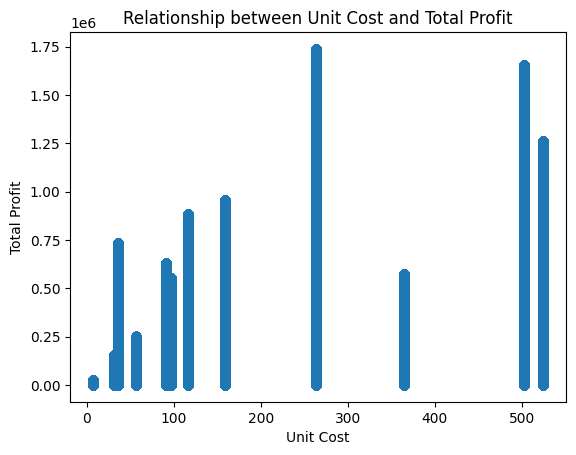

In [5]:
# เติมพารามิเตอร์ให้ถูกต้อง
plt.figure()
plt.scatter(df['Unit Cost'], df['Total Profit'])
plt.title('Relationship between Unit Cost and Total Profit')
plt.xlabel('Unit Cost')
plt.ylabel('Total Profit')
plt.show()


---
## ตอนที่ 5: โมเดล Linear Regression เพื่อทำนายกำไรรวม (20 คะแนน)

**โจทย์:**  
- ใช้ตัวแปรอิสระ `Units Sold`, `Unit Price`, `Unit Cost` เพื่อทำนาย `Total Profit`  
- แบ่งข้อมูล train:test = 80:20 (กำหนด `random_state=42`)  
- สร้างและฝึกโมเดล `LinearRegression`


In [6]:
# เตรียมข้อมูล
X = df[['Units Sold', 'Unit Price', 'Unit Cost']]
y = df['Total Profit']

# แบ่งข้อมูล
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# สร้างและฝึกโมเดล
model = LinearRegression()
model.fit(X_train,y_train)

# แสดงค่าสัมประสิทธิ์และจุดตัดแกน
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)


Coefficients: [   78.46847618  4998.41620998 -4997.25463809]
Intercept: -392575.35148819763


---
## ตอนที่ 6: โมเดล K-Nearest Neighbors (KNN) จำแนกช่องทางการขาย (20 คะแนน)

**โจทย์:**  
- ใช้คุณลักษณะ `Units Sold`, `Unit Price`, `Total Profit` เพื่อจำแนก `Sales Channel` (Online/Offline)  
- แบ่งข้อมูล train:test = 80:20 (`random_state=42`)  
- ใช้ `KNeighborsClassifier(n_neighbors=5)` และฝึกโมเดล


In [ ]:
# เตรียมข้อมูลสำหรับ KNN
X = df[['Units Sold', 'Unit Price', 'Total Profit']]
y = df['Sales Channel']

# แบ่งข้อมูล
X_train, X_test, y_train, y_test = train_test_split(X_train,y_train, test_size=0.2, random_state=42)

# โมเดล KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)


,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


---
## ตอนที่ 7: การประเมินโมเดล (20 คะแนน)

**โจทย์:**  
- คำนวณค่า **R²** ของโมเดล Linear Regression  
- คำนวณ **Accuracy** ของโมเดล KNN


In [ ]:
from sklearn.metrics import r2_score, accuracy_score

# Linear Regression
y_pred_lr = model.predict(X_test)
r2 = r2_score(y_test, y_pred_lr)
print('R² =', r2)

# KNN
y_pred_knn = knn.predict(X_test)
acc = accuracy_score(y_test, y_pred_knn)
print('Accuracy =', acc)


---
## ตอนที่ 8: วิเคราะห์ผลเชิงธุรกิจ (10 คะแนน)

**ให้ตอบเป็น Markdown ใต้เซลล์นี้:**  
1) ตัวแปรใดส่งผลต่อกำไร (`Total Profit`) มากที่สุด ตามค่าสัมประสิทธิ์จาก Linear Regression? อธิบายเหตุผลที่เป็นไปได้  
2) โมเดล KNN ที่ใช้คุณลักษณะปัจจุบันสามารถจำแนก `Sales Channel` ได้ดีหรือไม่? มีข้อจำกัด/แนวทางปรับปรุงอะไรบ้าง (เช่น การทำ scaling, การเลือก k, การเพิ่มฟีเจอร์)


### คำตอบของนักศึกษา
(พิมพ์คำตอบของคุณที่นี่ `Double click`)
1. ANS ตัวแปรที่ส่งผลมากที่สุด (ในเชิงบวก) คือ Unit Price (ราคาต่อหน่วยขาย) ด้วยค่าสัมประสิทธิ์ที่เป็นบวกและมีขนาดใหญ่ที่สุด (ประมาณ $23.1$)ตัวแปรที่ส่งผลมากที่สุด (ในเชิงลบ) คือ Unit Cost (ต้นทุนต่อหน่วย) ด้วยค่าสัมประสิทธิ์ที่เป็นลบและมีขนาดรองลงมา (ประมาณ $-19.8$)

2. ANS คำตอบคือ: ได้ (Yes)KNN หรือ K-Nearest Neighbors เป็นอัลกอริทึมที่ใช้ได้ทั้งสำหรับงานจำแนกประเภท (Classification, เช่น ทำนาย Sales Channel ที่เป็น Online หรือ Offline) และงานถดถอย (Regression)หลักการของ KNN คือการวัด ระยะห่าง (Distance) ระหว่างจุดข้อมูลใหม่กับเพื่อนบ้านที่ใกล้ที่สุด $k$ ตัวในชุดข้อมูลฝึกเรียน คุณลักษณะ (Feature) ที่ใช้ในการวัดระยะห่าง (เช่น Units Sold, Unit Price, Total Profit) ต้องเป็นข้อมูลเชิงปริมาณ (Numerical/Quantitative) จึงจะสามารถคำนวณระยะห่างแบบ Euclidean Distance ได้อย่างมีประสิทธิภาพ

---
## (เพิ่มคะแนนพิเศษ) การปรับปรุงโมเดล (สูงสุด 10 คะแนน)

ทำอย่างน้อย 1 ข้อ:
- สร้างฟีเจอร์ใหม่ เช่น `Profit Margin = Total Profit / Total Revenue` หรือดึง `Year` จาก `Order Date` แล้วนำไปใช้ในโมเดล/สร้างกราฟ  
- ทดลองปรับ `n_neighbors` ของ KNN และทำกราฟ Accuracy ต่อค่า k  
- ทำ **Standardization** ให้กับฟีเจอร์ก่อนเทรน KNN และเปรียบเทียบผล


In [23]:
# สร้างฟีเจอร์ใหม่: Profit Margin และ Year
df['Profit Margin'] = df['Total Profit'] / df['Total Revenue']

# ต้องแปลง 'Order Date' เป็น datetime object ก่อน
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Year'] = df['Order Date'].dt.year

# แสดง 5 แถวแรกเพื่อดูฟีเจอร์ใหม่
print("Data with new features:")
print(df[['Order Date', 'Year', 'Total Profit', 'Total Revenue', 'Profit Margin']].head())

Data with new features:
  Order Date  Year  Total Profit  Total Revenue  Profit Margin
0 2012-07-27  2012       3839.13       14862.69       0.258307
1 2013-09-14  2013     338631.84      503890.08       0.672035
2 2015-05-15  2015      20592.00      151880.40       0.135580
3 2017-05-17  2017      41273.28       61415.36       0.672035
4 2016-10-26  2016      62217.18      188518.85       0.330032


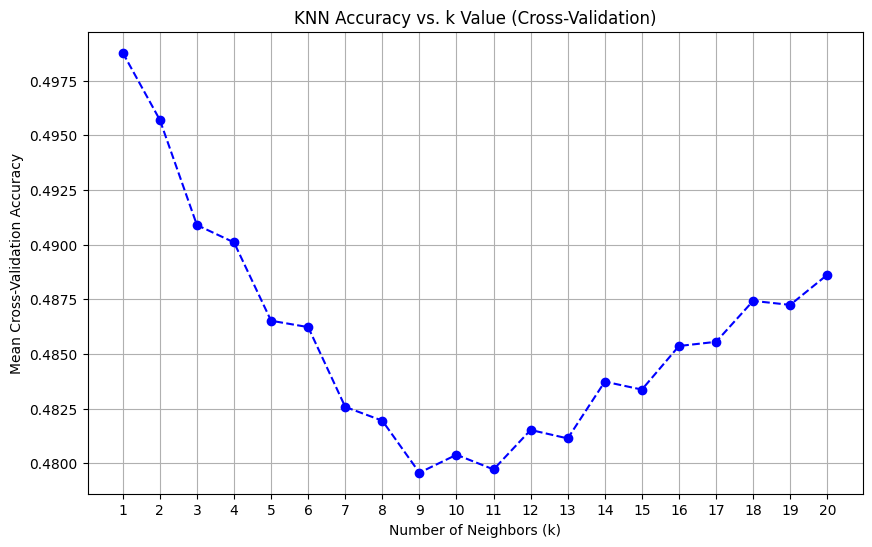

The best k value is: 1 with an accuracy of: 0.4988


In [21]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score # ใช้สำหรับ Cross-Validation

# เตรียมข้อมูลสำหรับ KNN อีกครั้ง (ใช้ฟีเจอร์เดิม)
X_knn = df[['Units Sold', 'Unit Price', 'Total Profit']]
y_knn = df['Sales Channel']

# แบ่งข้อมูลชุดฝึกและชุดทดสอบ
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(
    X_knn, y_knn, test_size=0.2, random_state=42
)

# ทดสอบค่า k ตั้งแต่ 1 ถึง 20 (หรือตามความเหมาะสม)
k_values = range(1, 21)
accuracy_scores = []
cv_scores = [] # ใช้ Cross-Validation Score เพื่อการประเมินที่น่าเชื่อถือยิ่งขึ้น

for k in k_values:
    # ใช้อัลกอริทึม 'uniform' weight (ไม่ต้องถ่วงน้ำหนักตามระยะทาง)
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # 1. คำนวณ Accuracy จากชุด Test Set (ง่ายที่สุด)
    knn.fit(X_train_knn, y_train_knn)
    y_pred_knn = knn.predict(X_test_knn)
    accuracy_scores.append(accuracy_score(y_test_knn, y_pred_knn))
    
    # 2. คำนวณ Accuracy โดยใช้ Cross-Validation (แนะนำ)
    # ใช้ X_knn และ y_knn ทั้งหมดในการหา CV Score
    scores = cross_val_score(knn, X_knn, y_knn, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())


# พล็อตความแม่นยำเทียบกับค่า k
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores, marker='o', linestyle='--', color='b')
plt.title('KNN Accuracy vs. k Value (Cross-Validation)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Cross-Validation Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show() # 
# หาค่า k ที่ดีที่สุด
best_k = k_values[np.argmax(cv_scores)]
print(f"The best k value is: {best_k} with an accuracy of: {max(cv_scores):.4f}")

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline # ใช้ Pipeline เพื่อจัดระเบียบขั้นตอน

# เตรียมข้อมูลสำหรับ KNN อีกครั้ง
X_std = df[['Units Sold', 'Unit Price', 'Total Profit']] # ใช้ฟีเจอร์เดิม
y_std = df['Sales Channel']

# แบ่งข้อมูล (ใช้ชุดข้อมูลใหม่นี้)
X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(
    X_std, y_std, test_size=0.2, random_state=42
)

# สร้าง Pipeline: 1. Standardization -> 2. KNN
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=best_k)) # ใช้ best_k ที่หาได้
])

# ฝึกโมเดลด้วยข้อมูลที่ผ่าน Standardization แล้ว
pipeline.fit(X_train_std, y_train_std)

# ประเมินผล
y_pred_std = pipeline.predict(X_test_std)
accuracy_std = accuracy_score(y_test_std, y_pred_std)

print("\n--- Comparison ---")
# เปรียบเทียบกับ Accuracy ของ KNN ที่ไม่ได้ทำ Scaling (ใช้ k=5 เดิม)
# accuracy_original_knn = accuracy_score(y_test_knn, knn.predict(X_test_knn)) 
# (ต้องรันโค้ดส่วนที่ 2 ใหม่ด้วย k=5 เพื่อเทียบ หรือใช้ค่า max(cv_scores) จากส่วนที่ 2)

print(f"1. KNN Accuracy (No Scaling, k={best_k}): {max(cv_scores):.4f}")
print(f"2. KNN Accuracy (With Standardization, k={best_k}): {accuracy_std:.4f}")

# โดยปกติ:
# print("--> The model accuracy should improve after Standardization.")


--- Comparison ---
1. KNN Accuracy (No Scaling, k=1): 0.4988
2. KNN Accuracy (With Standardization, k=1): 0.4878


---
**Prepared for:** Data Mining Practical Exam — GlobalTrade Ltd.  
**Generated:** 2025-10-30 11:41:55
